# 1.problem statment
  ## develop a sentiment analysis model to analyze customer reviews to classify sentiments positive,negative,neutral and to identify key topics for           actionable insights and to stream feedback analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# 2. Load data

  ## Data was downloaded from kaggale

In [2]:
df=pd.read_csv(r"C:\Users\SRINU\Downloads\archive (5)\tripadvisor_hotel_reviews.csv")

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df.columns

Index(['Review', 'Rating'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
df.duplicated().sum().sum()

0

In [7]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [9]:
df.shape

(20491, 2)

In [10]:
print(df.isnull().sum())

Review    0
Rating    0
dtype: int64


#  Data visualization

C:\Users\SRINU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


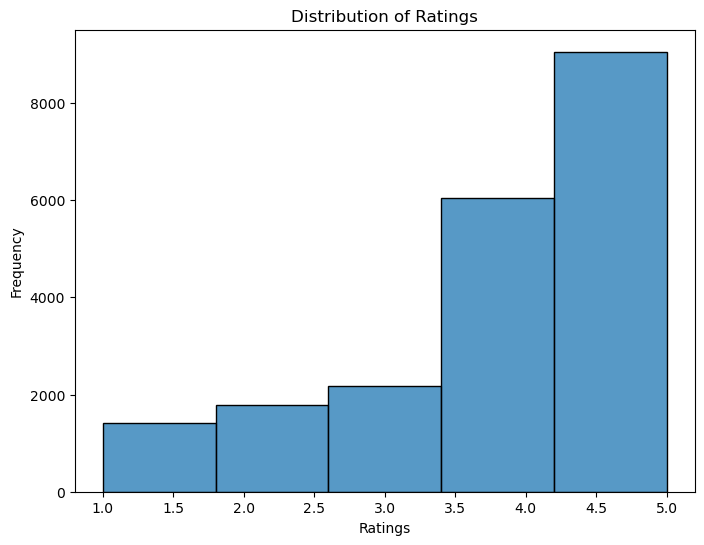

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

([<matplotlib.patches.Wedge at 0x26cd6412d50>,
 [Text(0.19982756971415777, 1.0816972507971598, ''),
  Text(-0.9316753506424054, -0.5847914508654783, ''),
  Text(0.2726145177672828, -1.0656835011871546, ''),
  Text(0.8337544318741861, -0.7175329590549505, ''),
  Text(1.0739980347578135, -0.23775664309615957, '')],
 [Text(0.10899685620772241, 0.5900166822529962, '44.2'),
  Text(-0.5081865548958574, -0.3189771550175336, '29.5'),
  Text(0.14869882787306332, -0.5812819097384478, '10.7'),
  Text(0.4547751446586469, -0.391381614029973, '8.8'),
  Text(0.5858171098678983, -0.1296854416888143, '6.9')])

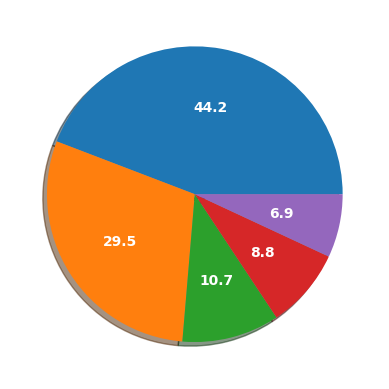

In [12]:
plt.pie(df['Rating'].value_counts(), shadow = True, textprops = {'color':'white', 'fontsize':10, 'fontweight':'bold'},autopct='%1.1f')

In [13]:
from textblob import TextBlob

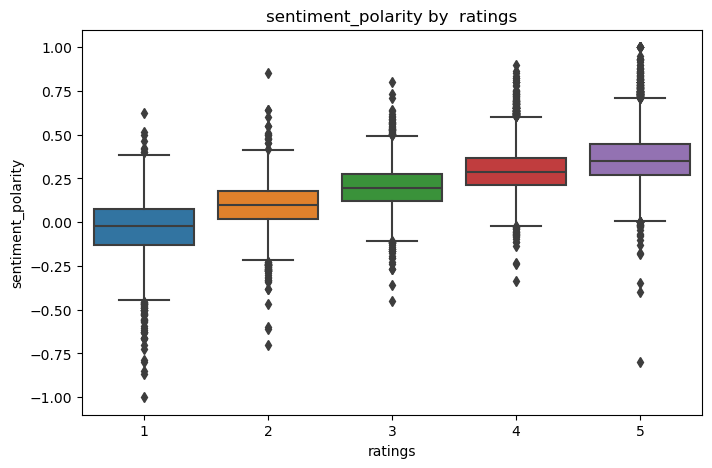

In [14]:
df["polarity_sentiment"]=df["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8,5))
sns.boxplot(x="Rating",y="polarity_sentiment",data=df)
sns.color_palette("hls", 8)
plt.title("sentiment_polarity by  ratings")
plt.xlabel("ratings")
plt.ylabel("sentiment_polarity")
plt.show()

### Insights:
1.Higher ratings tend to have more positive sentiment polarity closer to 1.
2.Lower ratings  both 1 and 2 have a wider range of sentiment polarity, including negative values.
3.Overall, sentiment polarity tends to be positive for higher ratings.

In [15]:
df

,Review,Rating,polarity_sentiment
0,nice hotel expensive parking got good deal sta...,4,0.208744
1,ok nothing special charge diamond member hilto...,2,0.214923
2,nice rooms not 4* experience hotel monaco seat...,3,0.294420
3,"unique, great stay, wonderful time hotel monac...",5,0.504825
4,"great stay great stay, went seahawk game aweso...",5,0.384615
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,0.221729
20487,great location price view hotel great quick pl...,4,0.503704
20488,"ok just looks nice modern outside, desk staff ...",2,0.171220
20489,hotel theft ruined vacation hotel opened sept ...,1,0.122573


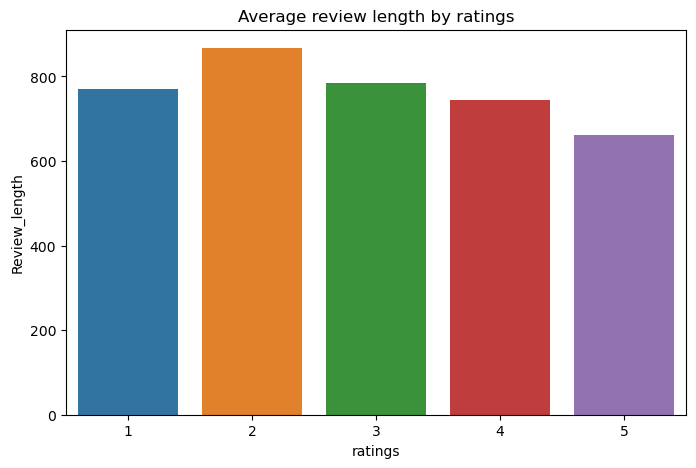

In [16]:
df["Review_length"]=df["Review"].apply(len)
avg_review=df.groupby('Rating')["Review_length"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x="Rating",y="Review_length",data=avg_review)
plt.title("Average review length by ratings")
plt.xlabel("ratings")
plt.ylabel("Review_length")
plt.show()

In [17]:
avg_review

,Rating,Review_length
0,1,769.534835
1,2,867.002789
2,3,784.664835
3,4,745.339957
4,5,661.696488


In [18]:
from wordcloud import WordCloud

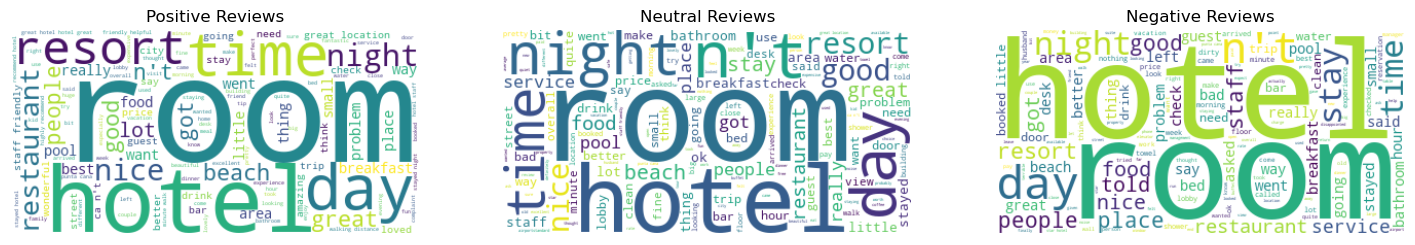

In [19]:
# Combine reviews based on ratings
positive_review = " ".join(x for x in df[df["Rating"] >= 4].Review)
neutral_review = " ".join(x for x in df[df["Rating"] == 3].Review)
negative_review = " ".join(x for x in df[df["Rating"] <= 2].Review)

# Create word clouds
wordclouds = {
    "Positive Reviews": positive_review,
    "Neutral Reviews": neutral_review,
    "Negative Reviews": negative_review,
}

# Plot word clouds
plt.figure(figsize=(18, 12))
for i, (label, text) in enumerate(wordclouds.items(), 1):
    plt.subplot(1, 3, i)
    plt.imshow(WordCloud(background_color="white", max_words=150, contour_width=3, contour_color="green").generate(text), interpolation="bilinear")
    plt.axis("off")
    plt.title(label)

plt.show()

# Sentiment Analysis on text data

In [20]:
def sentiment(rating):
    if rating>=4:
        return "Positive"
    elif rating < 3:
        return "Negitive"
    else:
        return "Neutral"
        
df["sentiment"]=df["Rating"].apply(sentiment)

In [21]:
df

,Review,Rating,polarity_sentiment,Review_length,sentiment
0,nice hotel expensive parking got good deal sta...,4,0.208744,593,Positive
1,ok nothing special charge diamond member hilto...,2,0.214923,1689,Negitive
2,nice rooms not 4* experience hotel monaco seat...,3,0.294420,1427,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,0.504825,600,Positive
4,"great stay great stay, went seahawk game aweso...",5,0.384615,1281,Positive
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,0.221729,733,Positive
20487,great location price view hotel great quick pl...,4,0.503704,306,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,0.171220,443,Negitive
20489,hotel theft ruined vacation hotel opened sept ...,1,0.122573,5557,Negitive


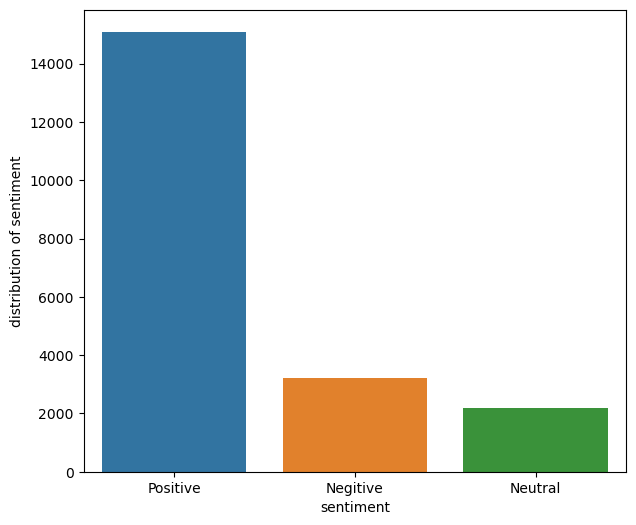

In [22]:
plt.figure(figsize=(7,6))
sns.countplot(x="sentiment",data=df)
plt.xlabel("sentiment")
plt.ylabel("distribution of sentiment")
plt.show()

C:\Users\SRINU\AppData\Local\Temp\ipykernel_24732\2857844177.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


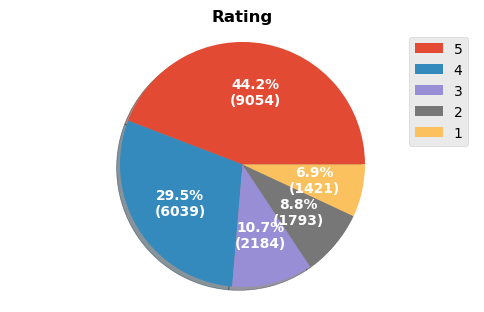

In [23]:
plt.style.use('ggplot')

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig,ax = plt.subplots(figsize = (6,3.5))
df_class = df['Rating'].value_counts().to_frame()
labels = df_class.index
values = df_class.iloc[:,0].to_list()
ax.pie(x = values, labels = labels, autopct = autopct_fun(values), shadow = True, textprops = {'color':'white', 'fontsize':10, 'fontweight':'bold'})
ax.legend(labels, loc = 'best')
ax.set_title('Rating', fontsize = 12, fontweight = "bold", color = "black")
ax.axis('equal')

fig.show()

In [24]:
df

,Review,Rating,polarity_sentiment,Review_length,sentiment
0,nice hotel expensive parking got good deal sta...,4,0.208744,593,Positive
1,ok nothing special charge diamond member hilto...,2,0.214923,1689,Negitive
2,nice rooms not 4* experience hotel monaco seat...,3,0.294420,1427,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,0.504825,600,Positive
4,"great stay great stay, went seahawk game aweso...",5,0.384615,1281,Positive
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,0.221729,733,Positive
20487,great location price view hotel great quick pl...,4,0.503704,306,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,0.171220,443,Negitive
20489,hotel theft ruined vacation hotel opened sept ...,1,0.122573,5557,Negitive


In [25]:
df["Review"][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [26]:
df['sentiment'].value_counts(normalize=True)

sentiment
Positive    0.736567
Negitive    0.156849
Neutral     0.106583
Name: proportion, dtype: float64

In [27]:
map={"Positive":1,"Negitive":0,"Neutral":2}
df["sentiment_n"]=df['sentiment'].map(map)
print(df["sentiment_n"].head())

0    1
1    0
2    2
3    1
4    1
Name: sentiment_n, dtype: int64


In [28]:
# identify the data

X=df.Review
y=df.sentiment_n

In [29]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier

In [30]:
# splitting data into train and test

In [76]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=143,stratify=y)

In [77]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(16392,) (16392,)
(4099,) (4099,)


In [78]:
  # Preprocessing on text data

In [79]:
def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

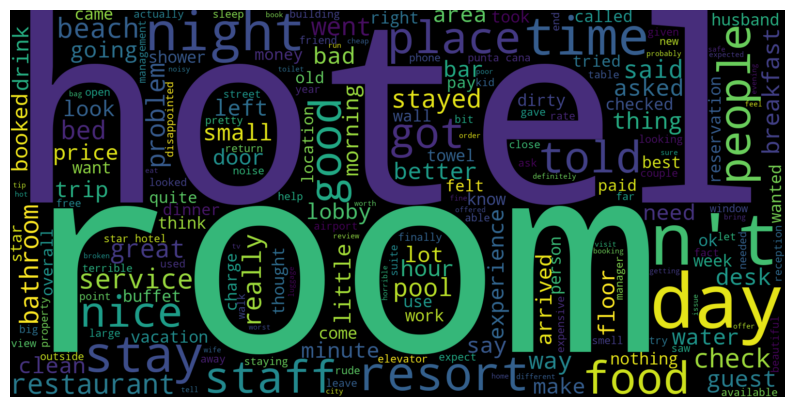

Negative: None


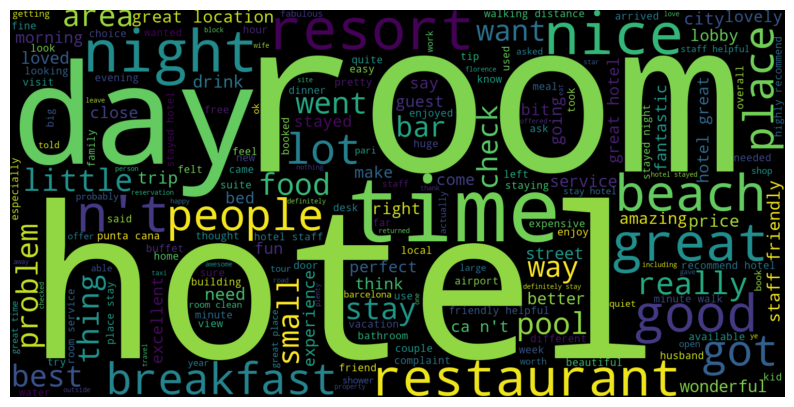

positive: None


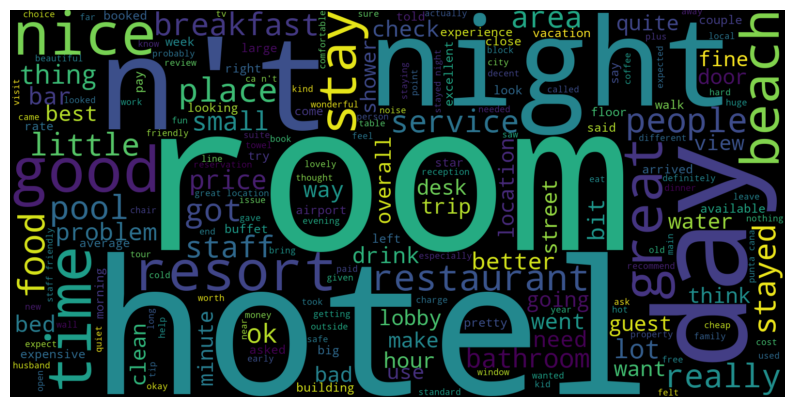

Neutral: None


In [80]:

#Negative Reviews
# Function to display word cloud
def display_wordcloud(data):
    wc = WordCloud(background_color='black', width=1600, height=800).generate(' '.join(data))

    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

print("Negative:",display_wordcloud(x_train[y_train ==0]))
print("positive:",display_wordcloud(x_train[y_train ==1]))
print("Neutral:",display_wordcloud(x_train[y_train ==2]))


In [81]:
import string
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [82]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [83]:
ct=CountVectorizer()
x_train_ct=ct.fit_transform(x_train)
x_test_ct=ct.transform(x_test)

In [84]:
x_test_ct.shape

(4099, 47082)

In [85]:
y_test.shape

(4099,)

In [86]:
x_train_ct.shape

(16392, 47082)

In [87]:
y_train.shape

(16392,)

 # Building a Model

In [88]:
nb=MultinomialNB()

In [145]:

model=nb.fit(x_train_ct,y_train)

# Evaluting Model on train data

In [90]:
y_train_pred=model.predict(x_train_ct)

In [91]:
y_train_pred.shape

(16392,)

In [92]:
accuracy=accuracy_score(y_train,y_train_pred)

In [93]:
accuracy

0.9011713030746705

In [94]:
cm=confusion_matrix(y_train,y_train_pred)

In [95]:
cm = confusion_matrix(y_train, y_train_pred)

In [96]:
cm

array([[ 2242,   290,    39],
       [  147, 11876,    51],
       [  203,   890,   654]], dtype=int64)

 # Evaluting test data

In [97]:
predicted=model.predict(x_test_ct)
accuracy1=accuracy_score(y_test,predicted)

In [98]:
accuracy

0.9011713030746705

In [99]:
print("train_accuracy:",accuracy_score(y_train,y_train_pred))
print("test_accuracy:",accuracy_score(y_test,predicted))

train_accuracy: 0.9011713030746705
test_accuracy: 0.8506952915345206


In [109]:
import nltk
from nltk.corpus import stopwords
import os
import joblib
from joblib import Memory
import warnings
warnings.filterwarnings('ignore')

In [112]:
 x_train_c = x_train.apply(lambda doc: clean(doc))

In [116]:
 x_test_c= x_test.apply(lambda doc: clean(doc))

In [117]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'xgboost': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', XGBClassifier())
    ], memory=memory)
}

param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000], 
            'classifier__C': [0.1, 1], 
            'classifier__penalty': ['l2'],  # Use only L2 penalty for logistic regression
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'xgboost': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 2000, 5000], 
            'classifier__max_depth': [3],
            'classifier__learning_rate': [0.1],
            'classifier__n_estimators': [60]  # Limit the number of estimators to 60
        }
    ]
}

best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(x_train_c, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(x_test_c, y_test))


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 39.6 s
Wall time: 40.6 s
Score on Test Data:  0.8319102220053671
********** logistic_regression **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 2min 28s
Wall time: 2min 34s
Score on Test Data:  0.7909246157599414
********** xgboost **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 23min 33s
Wall time: 3min 3s
Score on Test Data:  0.7994632837277384


In [118]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    solver='saga'))])

xgboost
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=5000)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
  

In [150]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'C:\\Users\\SRINU\\OneDrive\\Desktop\\sentiment\\{name}.pkl')
    model = joblib.load(f'C:\\Users\\SRINU\\OneDrive\\Desktop\\sentiment\\{name}.pkl')
    
    %time y_test_pred = model.predict(x_test_c)
    print("Test Score (accuracy)", accuracy_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'C:\\Users\\SRINU\\OneDrive\\Desktop\\sentiment\\{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 172 ms
Wall time: 336 ms
Test Score (accuracy) 0.8319102220053671
Model Size: 1067902 Bytes
********** logistic_regression **********
CPU times: total: 234 ms
Wall time: 240 ms
Test Score (accuracy) 0.7909246157599414
Model Size: 812937 Bytes
********** xgboost **********
CPU times: total: 1.16 s
Wall time: 328 ms
Test Score (accuracy) 0.7994632837277384
Model Size: 1106553 Bytes


In [146]:
model

MultinomialNB()